<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/graphing_exercise_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Coding Dojo/04 Week 4: Explanatory Viz/cereal.csv'
df = pd.read_csv(path)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


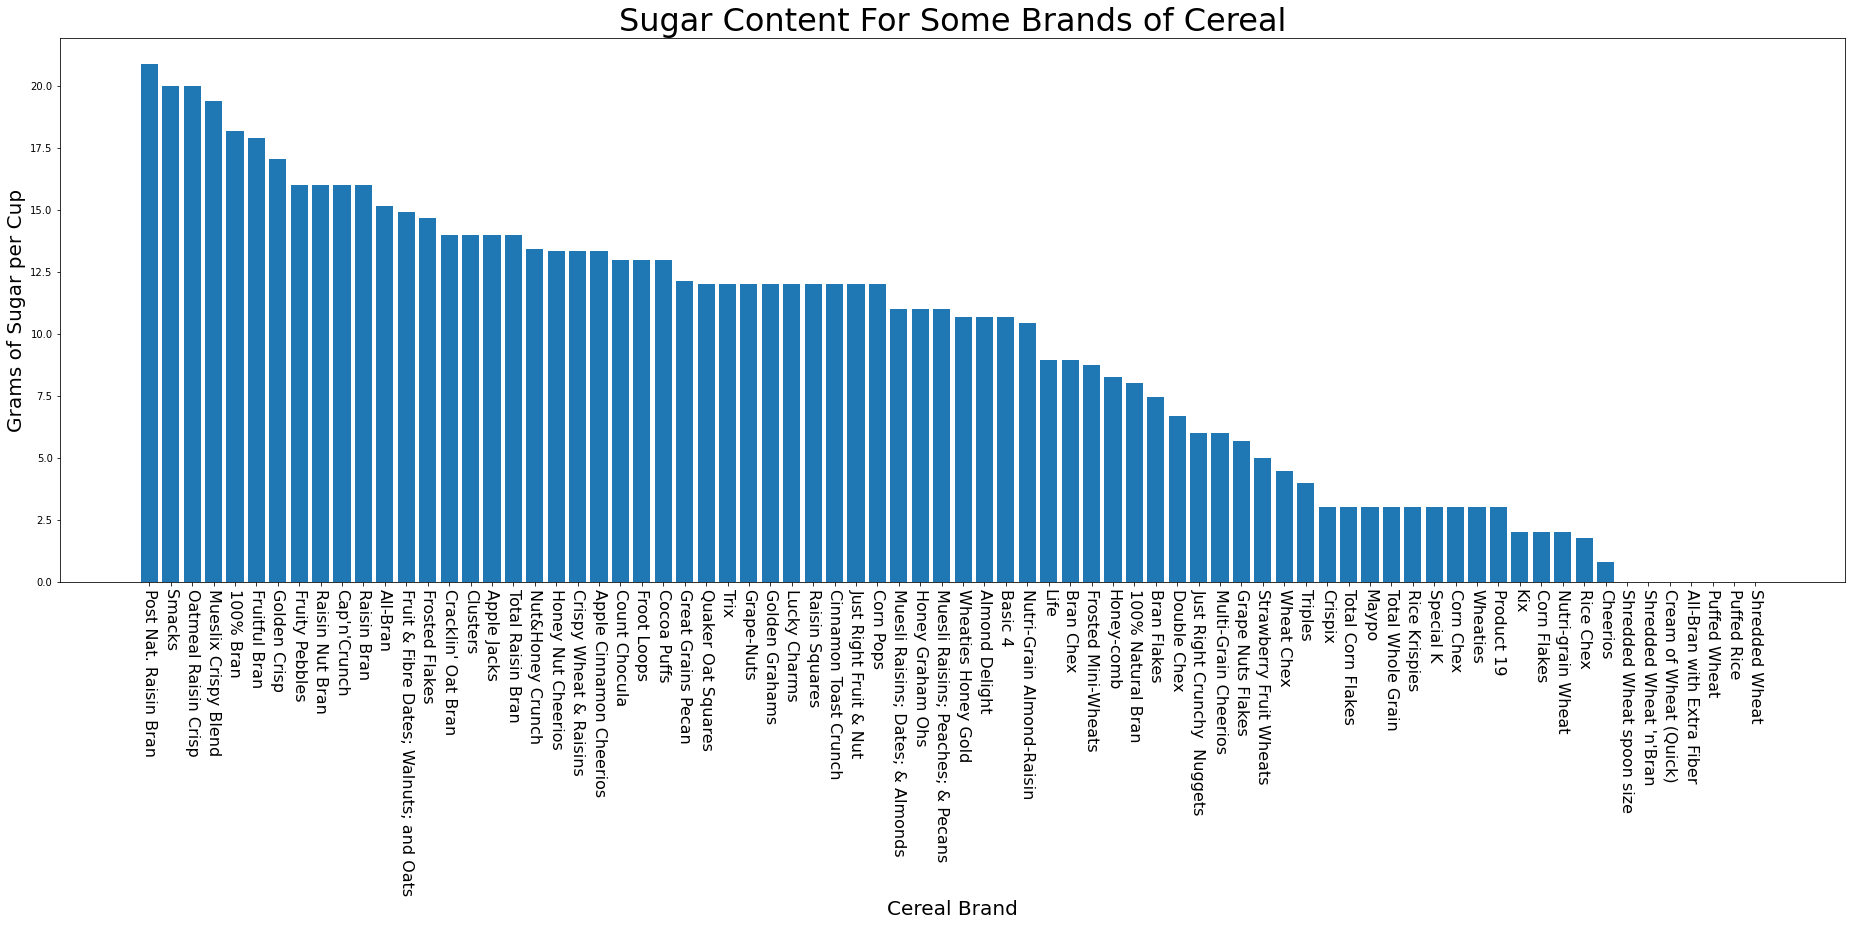

In [108]:
# Not all cereals give the same serving size so we will normalize the amount of sugar
sugar_content = pd.DataFrame(df['name'])
sugar_content = sugar_content.assign(sugar_per_cup = (df['sugars'] / df['cups']))
sugar_content.sort_values(by=['sugar_per_cup'], ascending = False, inplace = True)

# The negative valuefor the amount of sugar in the Quaker Oatmeal 
# seems odd so we will remove that value. 
filter = sugar_content['name'].str.contains('Quaker')
sugar_content.drop(57, inplace = True)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (32,10));
axes.bar(sugar_content['name'], sugar_content['sugar_per_cup']);
plt.xticks(rotation = -90);
plt.xticks(fontsize = 16);
plt.xlabel('Cereal Brand', fontsize = 20);
plt.ylabel('Grams of Sugar per Cup', fontsize = 20)
plt.title('Sugar Content For Some Brands of Cereal', fontsize = 32);